<a href="https://colab.research.google.com/github/yuli-05/Entrenamiento_no_supervisado/blob/main/Entrenamiento_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Datos personales**
Nombre: **Julissa Dominguez Badillo**

Matricula: **1718110384**

Grupo: **IDGS91**

Materia: **Extracción de conocimientos de bases de datos**

# **Problema**
Se tiene un conjunto de datos de erupciones de géiseres, y se desea clasificar para su estudio.

Los datos que se tienen son:

* TimeEruption = tiempo de erupcion en minutos.
* TimeWaiting = tiempo de espera para la siguiente erupcion.




# **Importar librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import sklearn
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# **Versiones**


In [2]:
print("Pandas {}".format(pd.__version__))
print("Numpy {}".format(np.__version__))
print("Matplotlib {}".format(matplotlib.__version__))
print("Sklearn {}".format(sklearn.__version__))

Pandas 1.1.5
Numpy 1.19.5
Matplotlib 3.2.2
Sklearn 1.0.1


In [4]:
!pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argcomplete==1.12.3
argon2-cffi==21.1.0
arviz==0.11.4
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==4.1.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.10
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2021.10.8
cffi==1.15.0
cftime==1.5.1.1
chardet==3.0.4
charset-normalizer==2.0.8
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.24
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4
distributed==1.25.3


# **Cargar el dataset**


In [6]:
df = pd.read_csv("geisers.csv")

# **Información del dataset**


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TimeEruption  272 non-null    float64
 1   TimeWaiting   272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


In [8]:
df.head()

,TimeEruption,TimeWaiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [9]:
df.describe()

,TimeEruption,TimeWaiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


# **Graficar el dataframe**


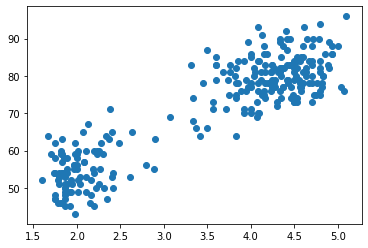

In [10]:
plt.scatter(df['TimeEruption'], df['TimeWaiting'])
plt.show()

# **Datos aleatorios**

In [11]:
TimeEruption = np.random.randint(100,size=100)
TimeWaiting = np.random.randint(100,size=100)

data = {
  'TimeEruption': TimeEruption,
  'TimeWaiting':  TimeWaiting
}

df_s = pd.DataFrame(data)

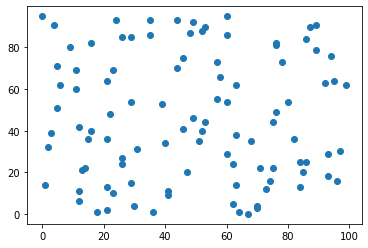

In [12]:
plt.scatter(df_s['TimeEruption'],df_s['TimeWaiting'])
plt.show()

# **Configurar modelo**

In [13]:
model = KMeans(n_clusters=2,max_iter=100)

# **Estandarizar los datos**

In [14]:
df = StandardScaler().fit_transform(df)

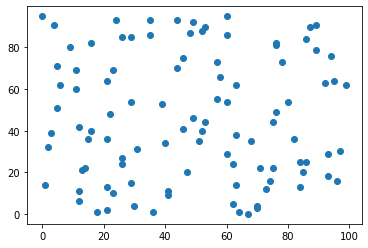

In [15]:
plt.scatter(df_s['TimeEruption'],df_s['TimeWaiting'])     
plt.show()

# **Graficar valores estandarizados**

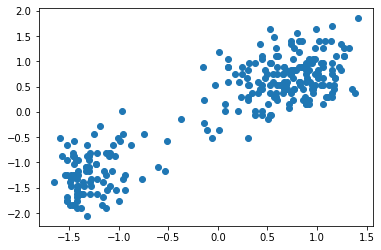

In [16]:
plt.scatter(df[:,0],df[:,1])
plt.show()

# **Entrenamiento**

In [17]:
model.fit(df)

KMeans(max_iter=100, n_clusters=2)

# **Centroides**

In [18]:
centroids = model.cluster_centers_
centroids

array([[-1.26008539, -1.20156744],
       [ 0.70970327,  0.67674488]])

# **Ver etiquetas**

In [19]:
model.labels_

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1], dtype=int32)

# **Graficar los centroides**

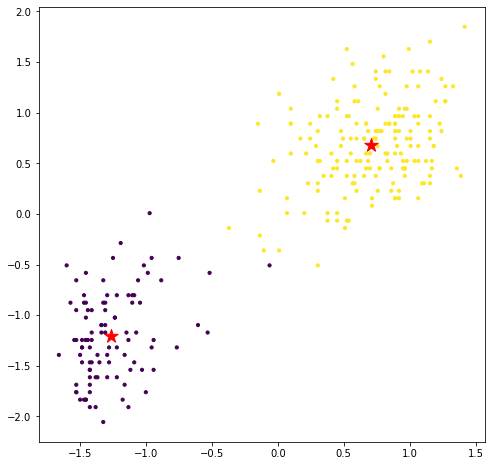

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(df[:,0],df[:,1], c=model.labels_.astype(float),s=10,label="clusters")
plt.scatter(centroids[:,0],centroids[:,1],c='red',marker="*",s=200,label="centroides")
plt.show()

# **Predicciones**


In [21]:
new_label = model.predict([(-1.0,0.0)])
new_label[0]

0

# **Seleccionar el número de clusters**

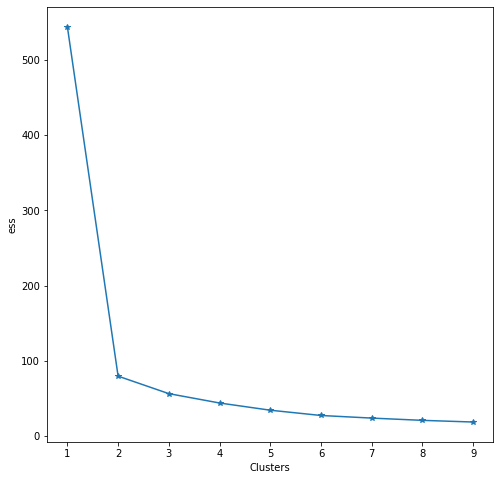

In [23]:
ess = [] 
list_k = list(range(1,10))

for k in list_k:
  model = KMeans(n_clusters=k)
  model.fit(df)
  ess.append(model.inertia_)

plt.figure(figsize=(8,8))
plt.plot(list_k,ess,"-*")
plt.xlabel("Clusters")
plt.ylabel("ess")
plt.show()

# **Graficar con distintos clusters**

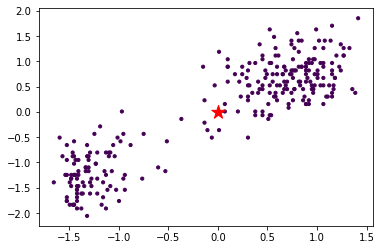

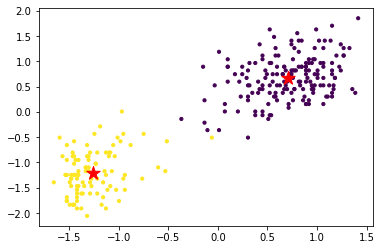

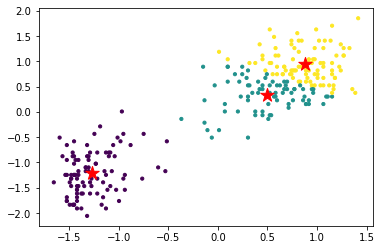

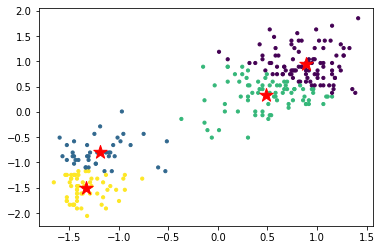

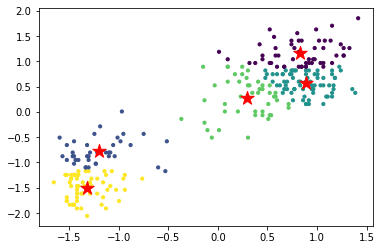

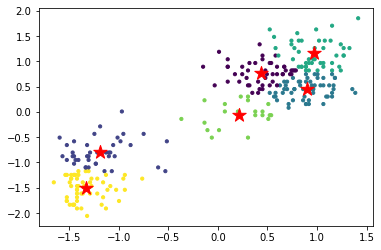

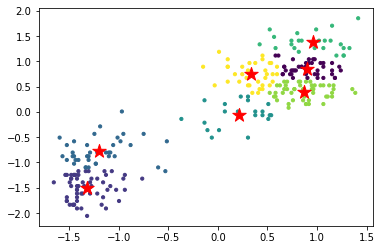

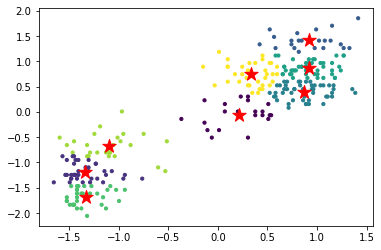

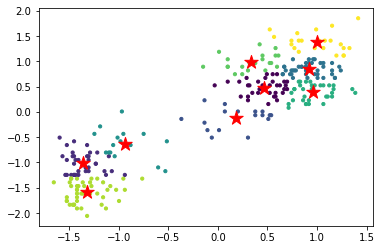

In [24]:
list_k = list(range(1,10))

for k in list_k:
  model = KMeans(n_clusters=k)
  model.fit(df)
  centroids = model.cluster_centers_
  plt.scatter(df[:,0],df[:,1], c=model.labels_.astype(float),s=10,label="clusters")
  plt.scatter(centroids[:,0],centroids[:,1],c='red',marker="*",s=200,label="centroides")
  plt.show()

# **Conclusión**

Como conclusión de esta ultima actividad es que cada vez son mas interesante, con todas las actividades que hemos realizado cada vez vamos apreniendo un poco más.

Con esta actividad de entrenamoento no supervisado infiere patrones de un conjunto de datos sin referencias a resultados conocidos o etiquetados.